# Data breaches visualization & analysis

## Dependencies

In [15]:
#pip install numpy
#pip install pandas
#pip install matplotlib

## Imports

In [16]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as npy

## Reading in data set

In [17]:
df = pd.read_csv("data_breaches.csv", encoding="latin-1")

## Information about data set 

In [18]:
dimensions = npy.shape(df)
numOfColumns = str(dimensions[1])
numOfRows = str(dimensions[0])

print("The dimensions for this dataset are " + str(dimensions) + "\n")
print("The number of columns for this dataset are " + str(numOfColumns) + "\n")
print("The number of rows for this dataset are " + str(numOfRows) + "\n")
print("The column headers for this data set consist of ")
print(df.columns)

df.head(20) #Show first 20 entries

The dimensions for this dataset are (352, 7)

The number of columns for this dataset are 7

The number of rows for this dataset are 352

The column headers for this data set consist of 
Index(['Unnamed: 0', 'Entity', 'Year', 'Records', 'Organization type',
       'Method', 'Sources'],
      dtype='object')


,Unnamed: 0,Entity,Year,Records,Organization type,Method,Sources
0,0,21st Century Oncology,2016,2200000,healthcare,hacked,[5][6]
1,1,500px,2020,14870304,social networking,hacked,[7]
2,2,Accendo Insurance Co.,2020,175350,healthcare,poor security,[8][9]
3,3,Adobe Systems Incorporated,2013,152000000,tech,hacked,[10]
4,4,Adobe Inc.,2019,7500000,tech,poor security,[11][12]
5,5,Advocate Medical Group,2017,4000000,healthcare,lost / stolen media,[13][14]
6,6,AerServ (subsidiary of InMobi),2018,75000,advertising,hacked,[15]
7,7,"Affinity Health Plan, Inc.",2013,344579,healthcare,lost / stolen media,[16][17]
8,8,Airtel,2019,320000000,telecommunications,poor security,[18]
9,9,Air Canada,2018,20000,transport,hacked,[19]


In [19]:
companyNamesColumn = df.Entity

companyNames = companyNamesColumn.value_counts().index.tolist()
print(companyNames)
print(str(len(companyNames)) + " companies affected")


['Facebook', 'Citigroup', 'AOL', 'Bethesda Game Studios', 'Uber', 'JP Morgan Chase', 'AT&T', 'Yahoo', 'TD Ameritrade', 'Twitch', 'Countrywide Financial Corp', 'Marriott International', 'MongoDB', 'Bell Canada', 'University of California, Berkeley', 'Sony Pictures', 'Scottrade', 'Scribd', 'Seacoast Radiology, PA', '21st Century Oncology', 'San Francisco Public Utilities Commission', 'Rosen Hotels', 'RockYou!', 'Restaurant Depot', 'Reddit', 'RBS Worldpay', 'Rambler.ru', 'Sakai City, Japan', 'Slack', 'Sega', 'Service Personnel and Veterans Agency (UK)', 'State of Texas', 'Starwoodincluding Westin Hotels & Resorts and Sheraton Hotels and Resorts', 'Starbucks', 'Stanford University', 'Spartanburg Regional Healthcare System', 'Southern California Medical-Legal Consultants', 'South Shore Hospital, Massachusetts', 'South Carolina Government', 'South Africa police', 'Sony PlayStation Network', 'Sony Online Entertainment', 'SolarWinds', 'SnapChat', 'SlickWraps', 'Quora', 'SingHealth', 'ShopBack'

{'2004': 2, '2005': 6, '2006': 7, '2007': 12, '2008': 16, '2009': 13, '2010': 19, '2011': 34, '2012': 23, '2013': 28, '2014': 26, '2014 and 2015': 1, '2015': 29, '2016': 22, '2017': 9, '2018': 27, '2018-2019': 1, '2019': 32, '2019-2020': 1, '2020': 32, '2021': 13, '2022': 5}


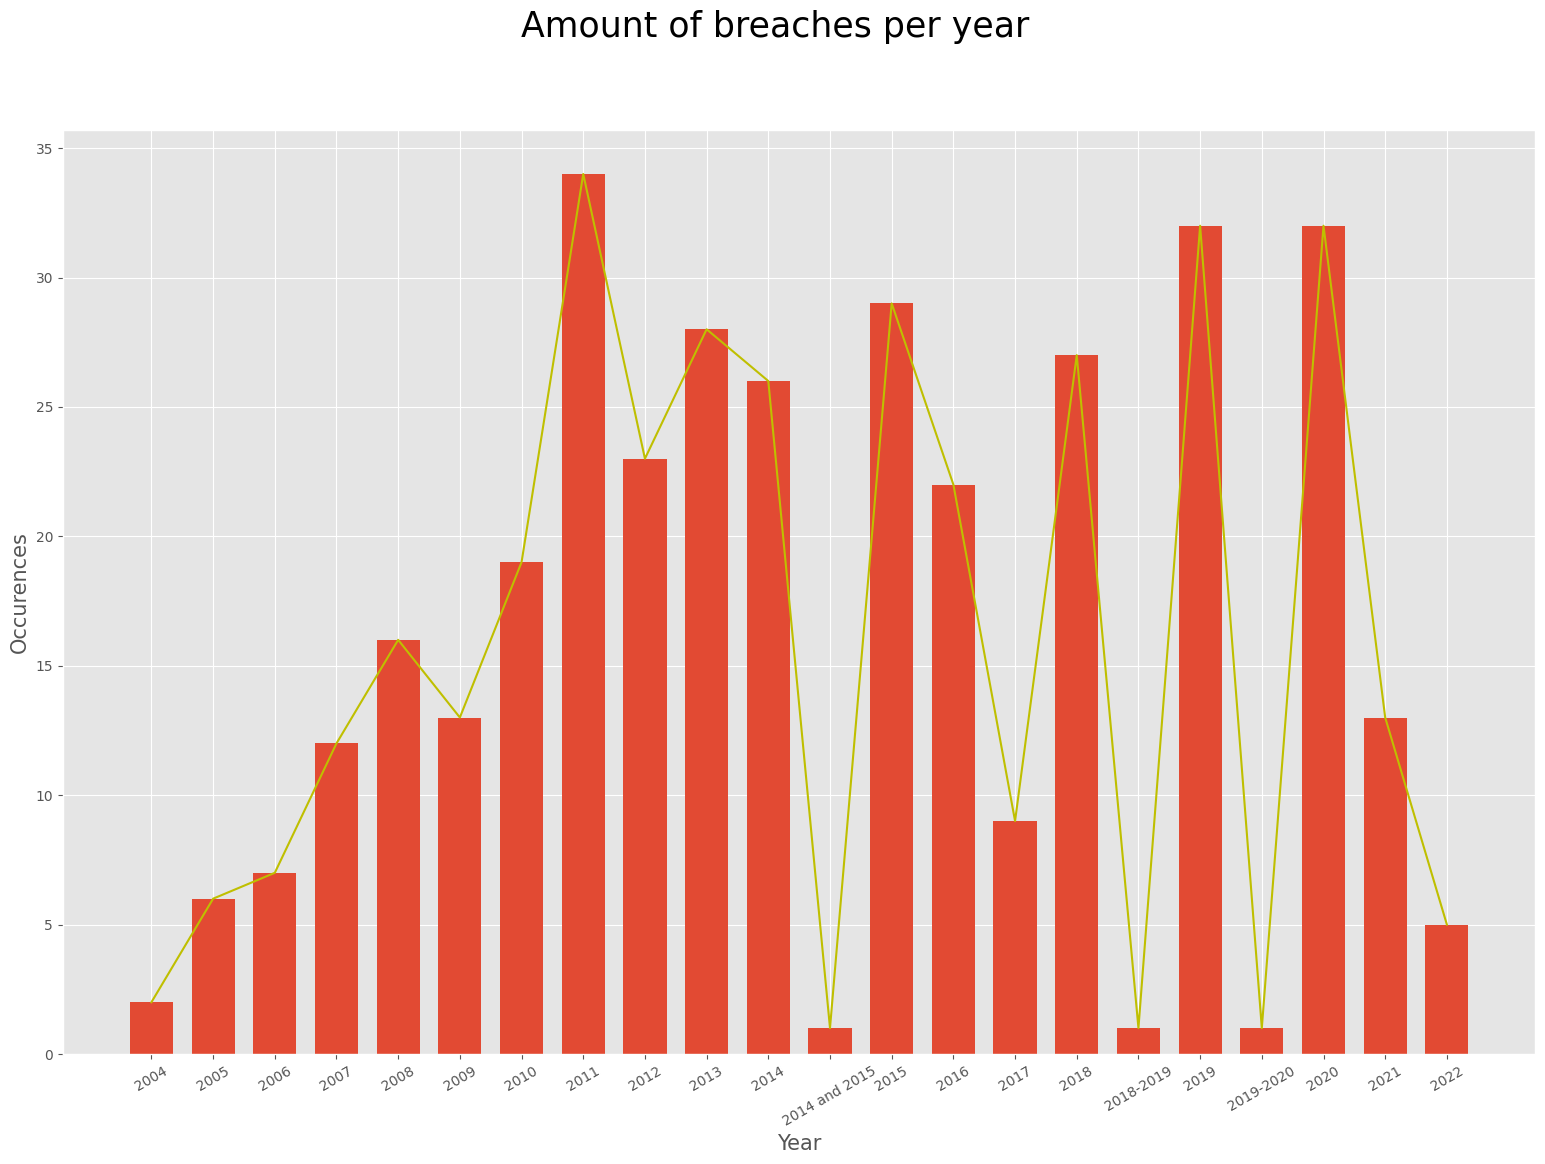

In [20]:
yearColumn = df.Year
yearList = yearColumn.value_counts().index.tolist()

yearOccurence = dict.fromkeys(yearList, None)

def occurencesPerYear(yearColumn, desiredYear):
    return yearColumn.str.count(desiredYear).sum()

for i in range(len(yearList)):
    temp = yearList[i]
    temp2 = occurencesPerYear(yearColumn, temp)
    
    yearOccurence.update([(temp, temp2)])

#sort years 
yearOccurence = dict(sorted(yearOccurence.items()))

print(yearOccurence)

plt.figure(figsize=(10,4))
plt.bar(yearOccurence.keys(), yearOccurence.values(),width=0.7)
plt.plot(yearOccurence.keys(),yearOccurence.values(), color="y")
plt.xlabel("Year", fontsize=15)
plt.ylabel("Occurences", fontsize=15)
fig = plt.gcf()

plt.xticks(fontsize=10, rotation=30)

fig.suptitle("Amount of breaches per year",fontsize=25)
fig.set_size_inches(19,12)
plt.style.use("ggplot")

plt.show()

{'hacked': 198.0, 'poor security': 47.0, 'lost / stolen media': 33.0, 'accidentally published': 21.0, 'inside job': 22.0, 'lost / stolen computer': 16.0, 'unknown': 7.0, 'improper setting, hacked': 2.0, 'poor security/inside job': 2.0, 'intentionally lost': 1.0, 'accidentally exposed': 1.0, 'publicly accessible Amazon Web Services (AWS) server': 0.0, 'hacked/misconfiguration': 1.0, 'rogue contractor': 1.0, 'ransomware hacked': 1.0, 'misconfiguration/poor security': 1.0, 'unprotected api': 1.0, 'zero-day vulnerabilities': 1.0, 'data exposed by misconfiguration': 1.0, 'Poor security': 1.0, 'poor security / hacked': 1.0, 'accidentally uploaded': 1.0, 'unsecured S3 bucket': 1.0, 'inside job, hacked': 1.0, 'social engineering': 1.0}
<class 'dict_keys'>


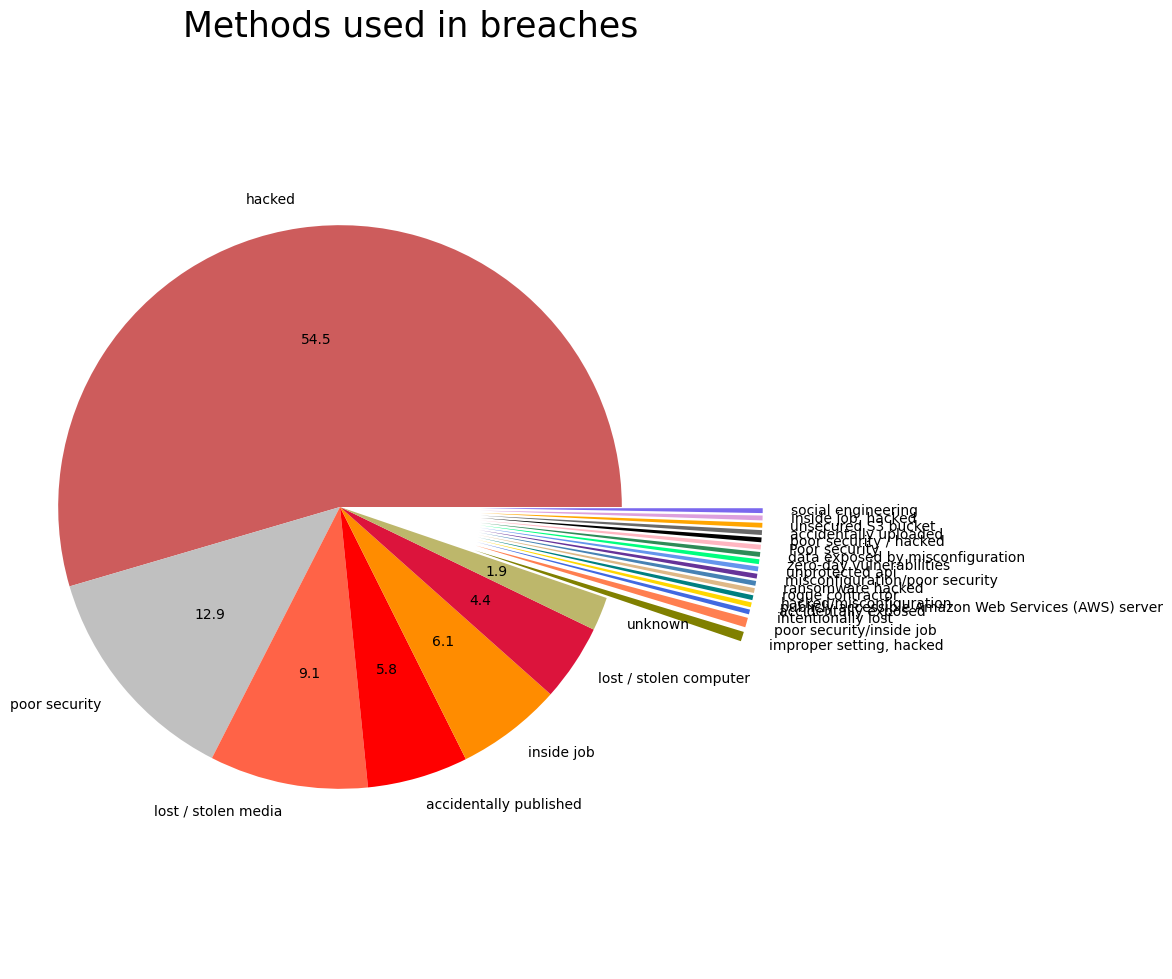

In [42]:
methodColumn = df.Method
methodsList = methodColumn.value_counts().index.tolist()

methodsOccurence = dict.fromkeys(methodsList, None)

def numOfMethods(methodColumn, desiredMethod):
    return methodColumn.str.count(desiredMethod).sum()

for i in range(len(methodsList)):
    temp = methodsList[i]
    temp2 = numOfMethods(methodColumn, temp)
    
    methodsOccurence.update([(temp, temp2)])

print(methodsOccurence)

labels = methodsOccurence.keys()
sizes = methodsOccurence.values()
explode=(0,0,0,0,0,0,0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5)

colors = ('indianred','silver','tomato','red','darkorange', 'crimson', 'darkkhaki', 'olive', 'coral', 'royalblue', 'gold', 'greenyellow', 'teal', 'burlywood','steelblue', 'rebeccapurple', 'cornflowerblue', 'springgreen', 'seagreen', 'lightpink', 'black', 'dimgray', 'orange', 'plum', 'mediumslateblue')

fig1,ax1 = plt.subplots()

patches,text,autotext = ax1.pie(sizes,colors=colors, explode = explode,labels=labels,autopct="%1.1f%%")
ax1.axis('equal')
fig2 = plt.gcf()
fig2.set_size_inches(10,12)
plt.title('Methods used in breaches', fontsize=25)

plt.show()